In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [42]:
#Make the scatterplot matrix

df = pd.read_csv('auction.csv')

# 3584 df1 = df['product_photos_qty']
#df = df.set_index(['order_status'])
df.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [60]:
#Take a subset of the data to make plots clearer.
df_auct = df.loc[
    ((df['auction_type'] == '3 day auction') | (df['auction_type'] == '5 day auction')),
    ['auction_type', 'bid', 'bidtime', 'bidderrate', 'openbid', 'price']
]

df_auct.head()

,auction_type,bid,bidtime,bidderrate,openbid,price
0,3 day auction,175.0,2.230949,0.0,99.0,177.5
1,3 day auction,100.0,2.600116,0.0,99.0,177.5
2,3 day auction,120.0,2.600810,2.0,99.0,177.5
3,3 day auction,150.0,2.601076,2.0,99.0,177.5
4,3 day auction,177.5,2.909826,4.0,99.0,177.5


In [61]:
#df_auct = pd.DataFrame(data=df_auct['bid', 'bidtime', 'bidderrate', 'openbid', 'price'], dtype=np.int8)
df_auct.dtypes

auction_type     object
bid             float64
bidtime         float64
bidderrate      float64
openbid         float64
price           float64
dtype: object

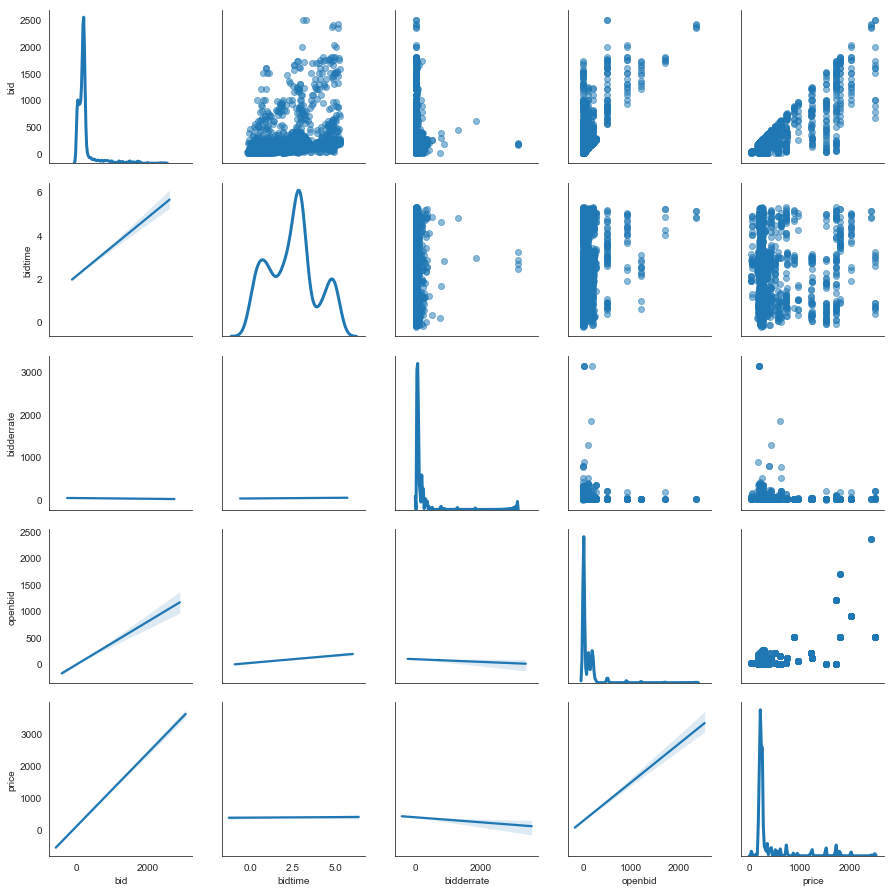

In [62]:
#Make a copy of the data to add jitter to and plot.
df_jittered = df_auct.loc[
    :, 'bid':'price'
].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot
g.map_upper(plt.scatter, alpha=.5)
#fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate disctributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up beacsue the plot does not include a legend. 

                 bid   bidtime  bidderrate   openbid     price
bid         1.000000  0.226148   -0.012244  0.675680  0.843996
bidtime     0.226148  1.000000    0.031453  0.156332 -0.033315
bidderrate -0.012244  0.031453    1.000000 -0.009532 -0.021627
openbid     0.675680  0.156332   -0.009532  1.000000  0.545930
price       0.843996 -0.033315   -0.021627  0.545930  1.000000


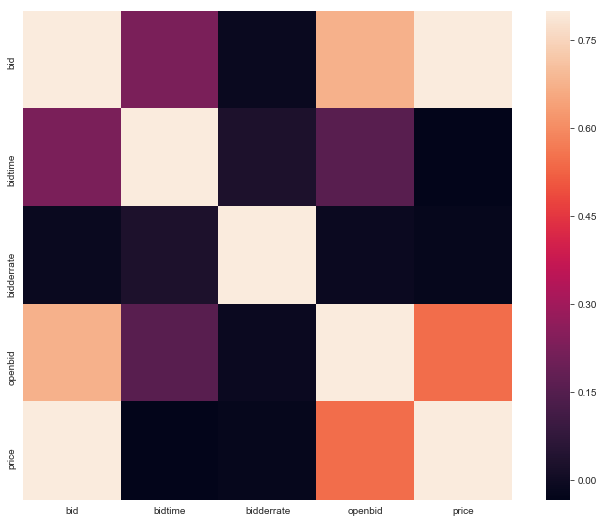

In [56]:
#Make the correlation matrix.
corrmat = df_auct.corr()
print(corrmat)

#Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

#Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
#Heatmaps are a great way to get a quick visual read on a big correlation matrix.

#try to match the correlation numbers to the scatterplots above to get a
# sense of what each magnmitute of correlation can look like.

C:\Users\Zack\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


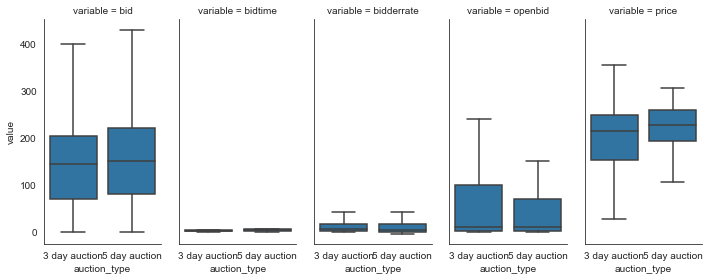

                  bid                                                     \
                count        mean         std   min   25%    50%     75%   
auction_type                                                               
3 day auction  2023.0  166.124503  199.259155  0.02  70.0  145.0  203.25   
5 day auction  1617.0  230.266865  320.953080  0.06  80.0  150.0  220.00   

                      bidderrate              ...   openbid           price  \
                  max      count       mean   ...       75%     max   count   
auction_type                                  ...                             
3 day auction  2500.0     2023.0  27.991597   ...     99.99  1200.0  2023.0   
5 day auction  2425.0     1617.0  28.680272   ...     70.00  2350.0  1617.0   

                                                                           
                     mean         std    min    25%    50%    75%     max  
auction_type                                                           

In [66]:
#Plot all the variables with boxplots for each auction type.

#Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable seperately.
df_long = df_auct
df_long = pd.melt(df_long, id_vars=['auction_type'])

g = sns.FacetGrid(df_long, col="variable", height=4, aspect=.5)
g = g.map(sns.boxplot, "auction_type", "value", showfliers=False)
plt.show()

#Descriptive statistics by group.
print(df_auct.groupby('auction_type').describe())

# Test whether group differences are significant 
for col in df_auct.loc[:,'bid':'price'].columns:
    print(col)
    print(stats.ttest_ind(
        df_auct[df_auct['auction_type'] == '3 day auction'][col].dropna(),
        df_auct[df_auct['auction_type'] == '5 day auction'][col].dropna()
    ))
    

bid, bidtime and price seem significantly different for the two auction types.

In [67]:
print(df.auction_type.unique())

['3 day auction' '5 day auction' '7 day auction']


In [69]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['auction_type'])

# Nordic countries dummy.
features['7 day auction'] = np.where((df['auction_type'].isin(['7 day auction'])), 1, 0)

print(pd.crosstab(features['7 day auction'], df['auction_type']))

auction_type   3 day auction  5 day auction  7 day auction
7 day auction                                             
0                       2023           1617              0
1                          0              0           7041


In [70]:
features['openbid_200plus'] = np.where(df['openbid']>=200, 1, 0)

#Check to make sure that worked.
print(df['openbid'].groupby(features['openbid_200plus']).describe())

                   count        mean         std     min     25%    50%  \
openbid_200plus                                                           
0                10074.0   26.396110   46.220035    0.01    0.99    1.0   
1                  607.0  481.264992  518.769350  200.00  215.00  300.0   

                   75%      max  
openbid_200plus                  
0                 25.0   199.99  
1                500.0  5000.00  


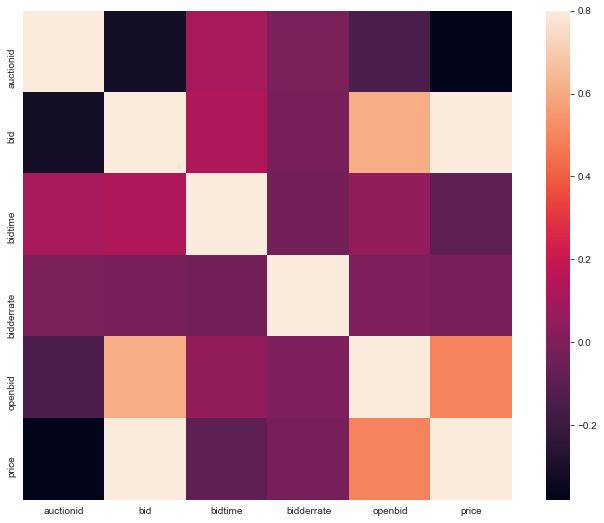

In [71]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [73]:
means = df[['openbid','price']].mean(axis=0)
stds = df[['openbid','price']].std(axis=0)
features['openbid_price'] = ((df[['openbid', 'price']] - means) / stds).mean(axis=1)

plotdf = df.loc[:, ['openbid', 'price']]
plotdf['openbid_price'] = features['openbid_price']
corrmat2 = plotdf.corr()

print(corrmat2)


                openbid     price  openbid_price
openbid        1.000000  0.495343        0.86468
price          0.495343  1.000000        0.86468
openbid_price  0.864680  0.864680        1.00000


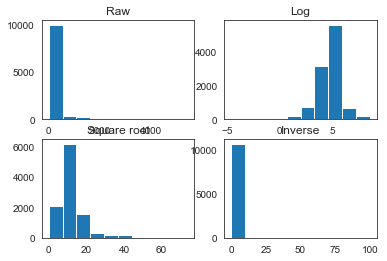

In [75]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['bid'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['bid'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['bid'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['bid'].dropna())
plt.title('Inverse')
plt.show()

In [76]:

features['log_bid'] = np.log(df['bid'])

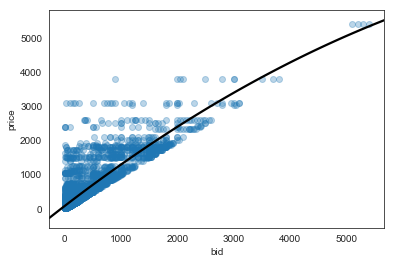

In [78]:
sns.regplot(
    df['bid'],
    y=df['price'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['bid_squared'] = df['bid'] * df['bid']